In [648]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [649]:
%autoreload
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '../')
from constants import *
from utilities_RF import *
from utilities import *

In [650]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'direct_rad:W',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}
wanted_months = [3,4,5,6,7,8,9]

# Dataset A

In [651]:
selected_features_a = selected_features.copy()
selected_features_a.remove("direct_rad:W")
hyperparameters_a = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_a = wanted_months

In [652]:
X_train_a = prepare_X(X_observed_a, X_estimated_a, selected_features_a, wanted_months_a)
X_train_a, y_train_a = resize_training_data(X_train_a, y_a)
X_test_a = prepare_testdata_rf_a(X_test_a, selected_features_a)

In [653]:
rf_a = Random_Forest(hyperparameters, X_train_a, X_test_a, y_train_a)

In [654]:
rf_a_cross_val_predictions,rf_a_cross_val_actuals, rf_a_cross_val_mae_mean = rf_a.cross_val_stack(X_train_a, y_train_a)

In [655]:
rf_a.cross_validate(X_train_a, y_train_a)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [304.2244499  299.76548607 303.00740137 299.45533989 132.51457471]
Mean cross-validation score: 267.7934503890109


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


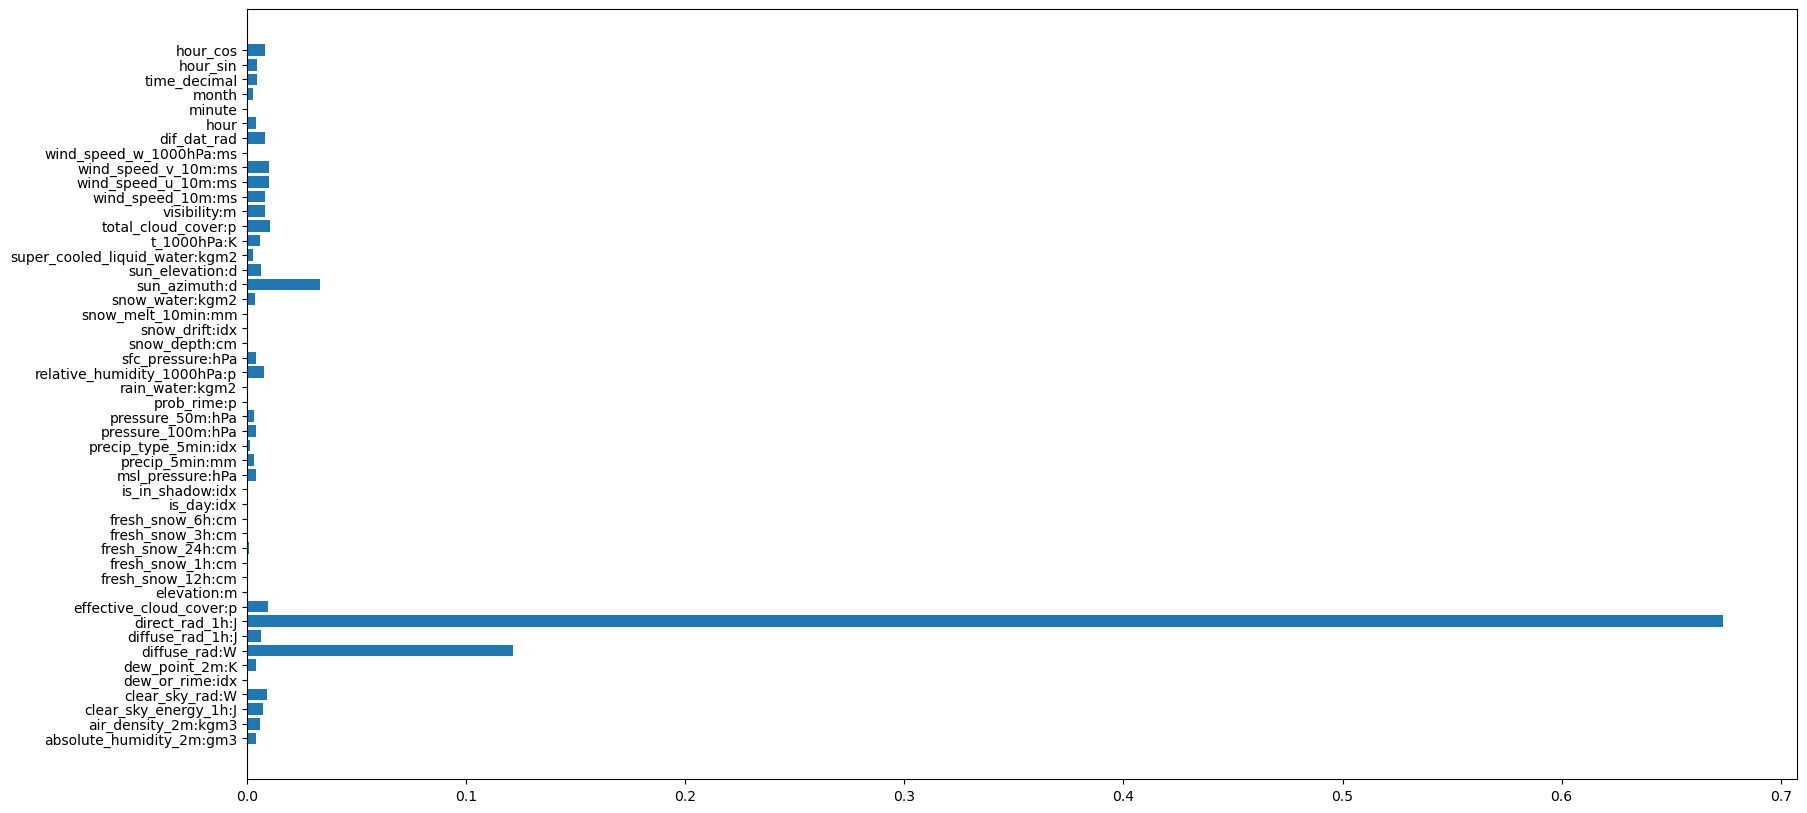

In [656]:
rf_a.fit()
rf_a.pred()
rf_a_test_pred = rf_a.prediction
rf_a.feature_importence_plot()

Pearson correlation: 0.92


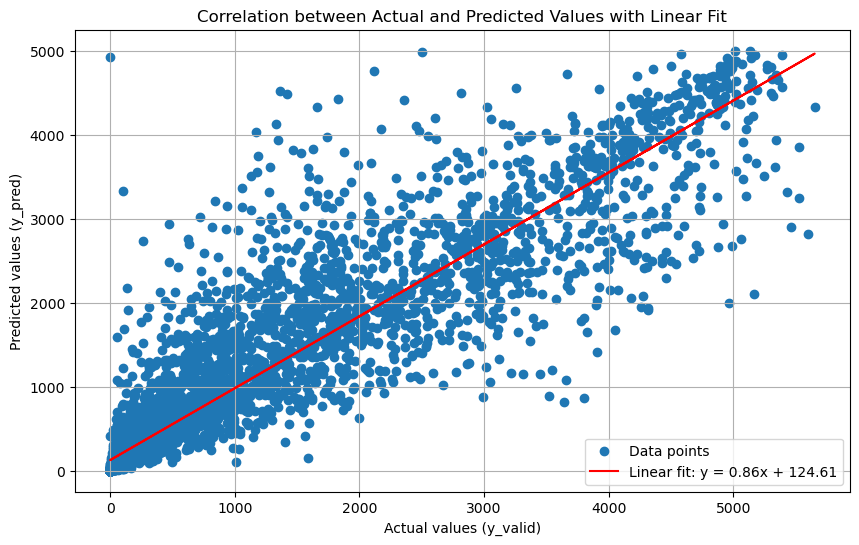

In [657]:
rf_a.corr_plot()

# Dataset B

In [658]:
selected_features_b = selected_features
hyperparameters_b = {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_b = wanted_months

In [659]:
X_train_b = prepare_X(X_observed_b, X_estimated_b, selected_features_b, wanted_months_b)
X_train_b, y_train_b = resize_training_data(X_train_b, y_b)
X_test_b = prepare_testdata_rf_a(X_test_b, selected_features_b)

In [660]:
rf_b = Random_Forest(hyperparameters_b, X_train_b, X_test_b, y_train_b)

In [661]:
rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_a, y_train_a)

In [662]:
rf_b.cross_validate(X_train_b, y_train_b)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [54.45086532 52.60935607 56.0331435  45.13159253 27.17636132]
Mean cross-validation score: 47.080263748742574


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


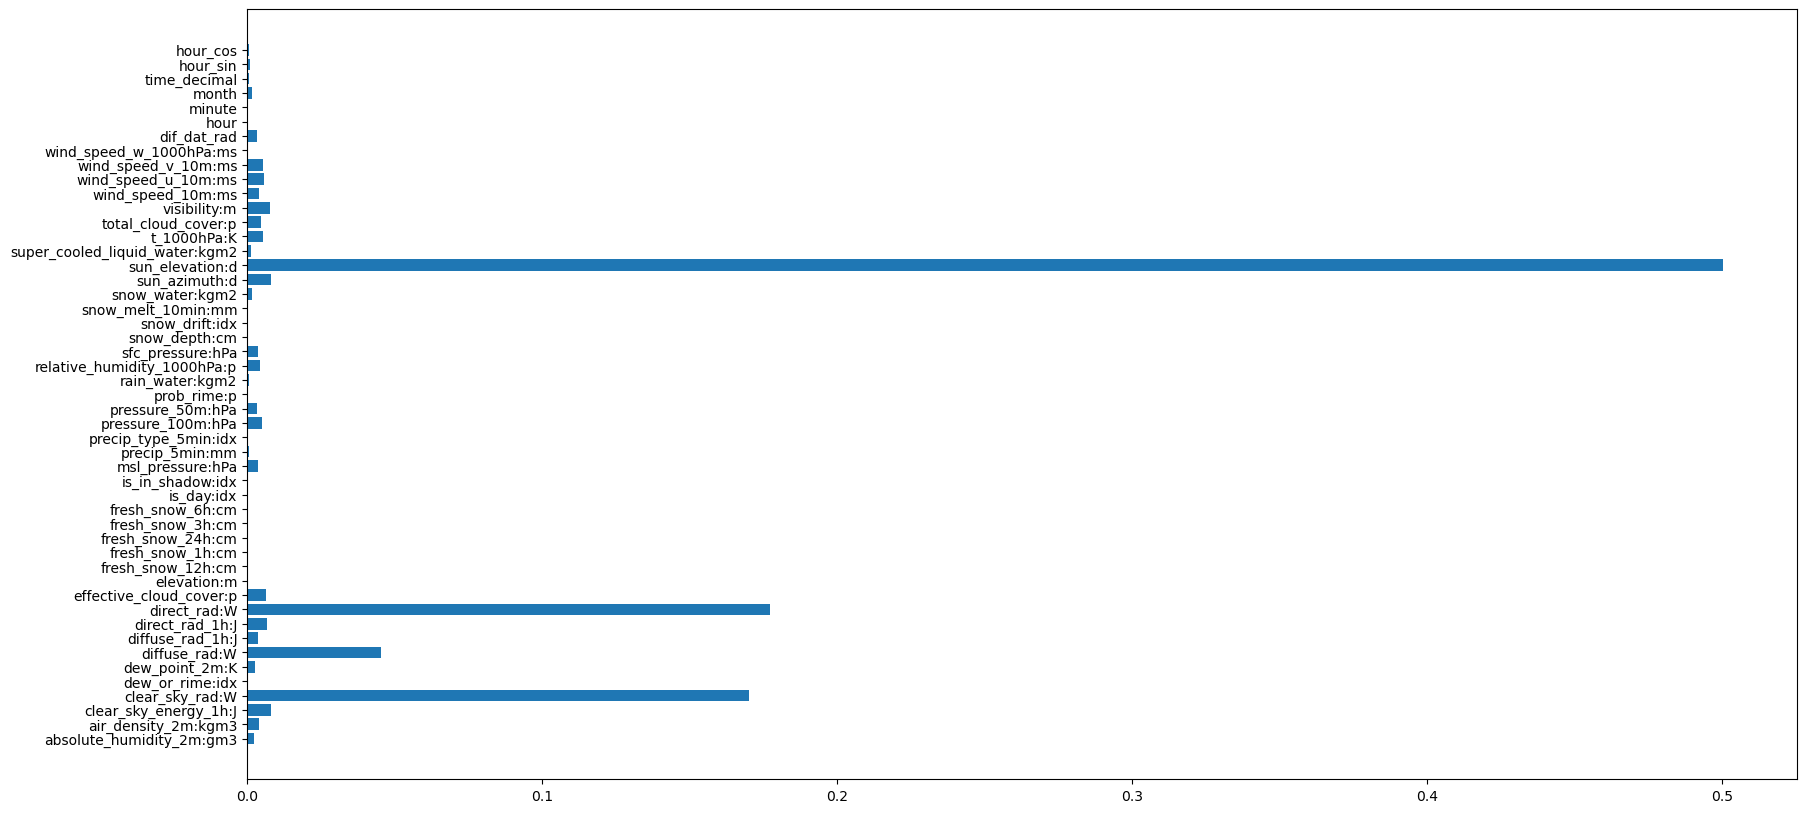

In [663]:
rf_b.fit()
rf_b.pred()
rf_b_test_pred = rf_b.prediction
rf_b.feature_importence_plot()

# Dataset C

In [664]:
selected_features_c = selected_features
hyperparameters_c = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
wanted_months_c = wanted_months

In [665]:
X_train_c = prepare_X(X_observed_c, X_estimated_c, selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c, y_c)
X_test_c = prepare_testdata_rf_a(X_test_c, selected_features_c)

In [666]:
rf_c = Random_Forest(hyperparameters, X_train_c, X_test_c, y_train_c)

In [667]:
rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_a, y_train_a)

In [668]:
rf_c.cross_validate(X_train_c, y_train_c)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [45.36541868 41.20857943 48.9545388  34.6801305  22.44354941]
Mean cross-validation score: 38.53044336402637


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [669]:
rf_c.fit()
rf_c.pred()
rf_c_test_pred = rf_c.prediction

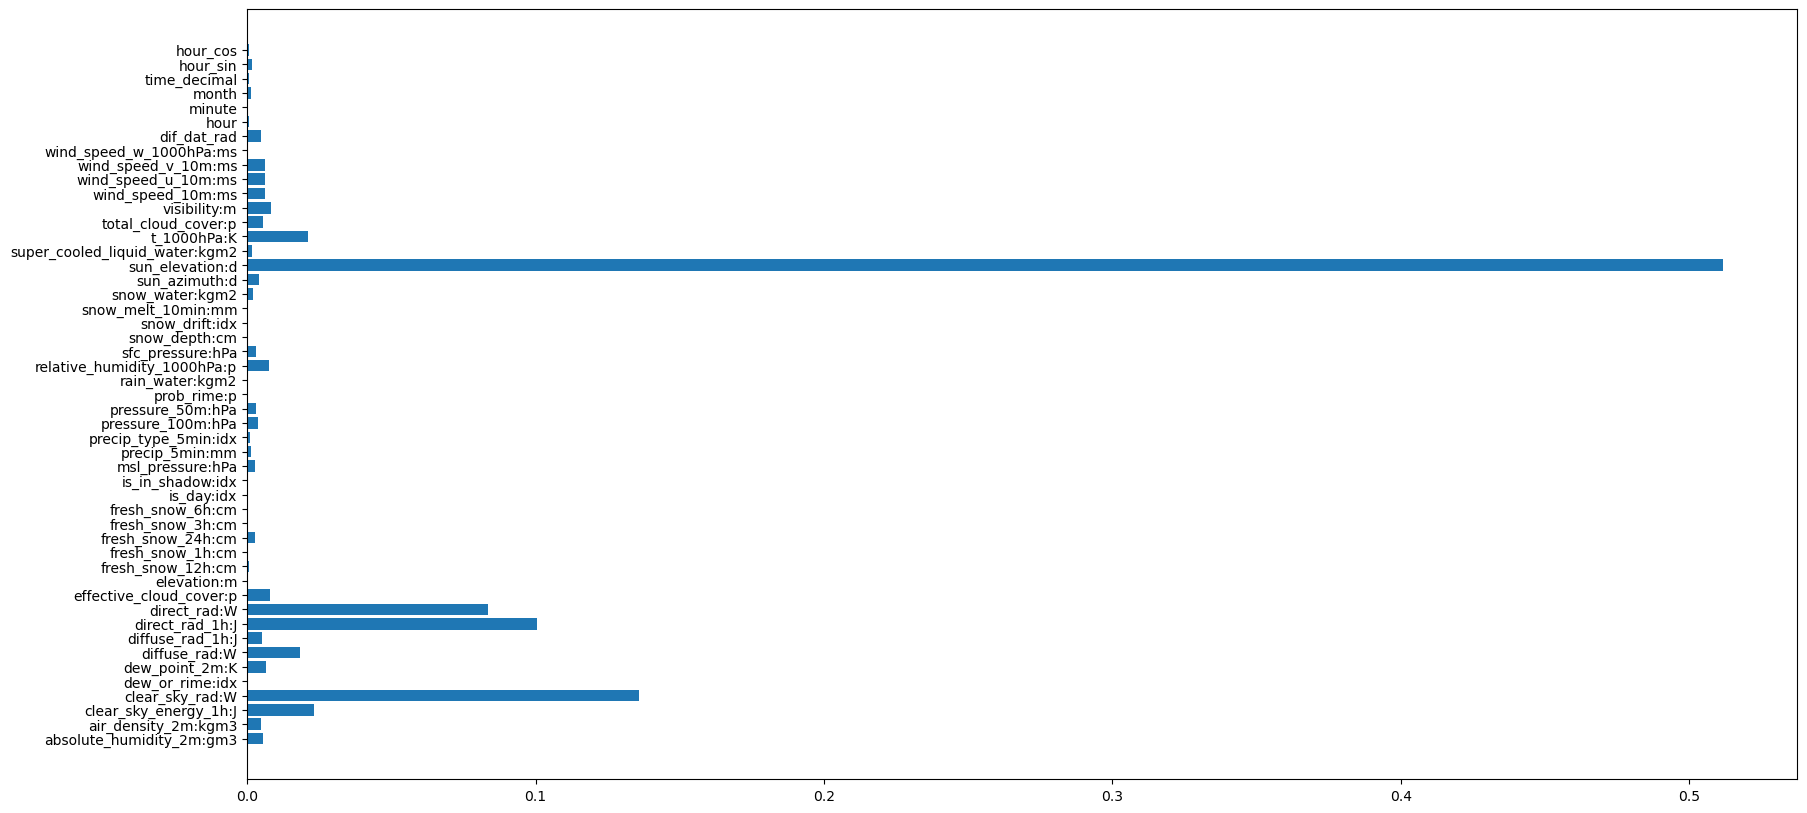

In [670]:
rf_c.feature_importence_plot()